In [26]:
import utilities as uts #general utilities that are useful for all methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 36):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'ReH': 'ReHtilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    #print([round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)])
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReH, bins = buckets[0])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReHtilde, bins = buckets[2])

    plt.legend(["ReH", "ReE", "ReHtilde"])
    plt.title(str(setNum) + " Distribution")

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500)
    plt.axvline(x=realValues[1], ymin=0, ymax=500)
    plt.axvline(x=realValues[2], ymin=0, ymax=500)

sets = [0, 1, 2, 3]
realValues = getRealValues(sets, numPhi=36)

In [2]:
def getData(errValues):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    reals = getRealValues([0], numPhi = 36)

    for err in errValues: 
        data = pd.read_csv("Predictions\Method2-" + str(err) +  ".csv")
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))

        ReHMean.append(abs(round(reals[0][0] - np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(reals[0][1] - np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(reals[0][2] - np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

In [48]:
errValues = [0.1, 0.01, 0.2, 0.3, 0.03, 0.5, 0.05, 0.15, 0.25, 0.075, 0.4] #0.02, 0.075, 0.4, 0.75, 0.25 
ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues)

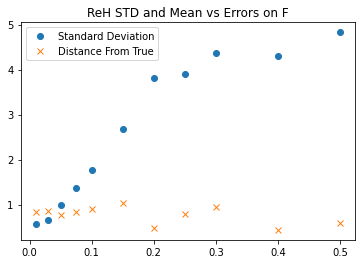

In [49]:
plt.plot(errValues, ReHSTD, 'o', label = 'Standard Deviation')
plt.plot(errValues, ReHMean, 'x', label = 'Distance From True')
plt.title("ReH STD and Mean vs Errors on F")
plt.legend()

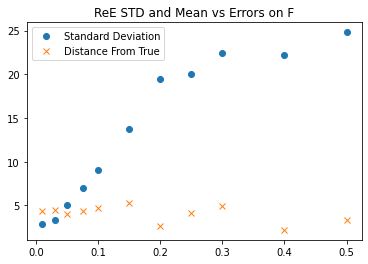

In [50]:
plt.plot(errValues, ReESTD, 'o', label = 'Standard Deviation')
plt.plot(errValues, ReEMean, 'x', label = 'Distance From True')
plt.title("ReE STD and Mean vs Errors on F")
plt.legend()

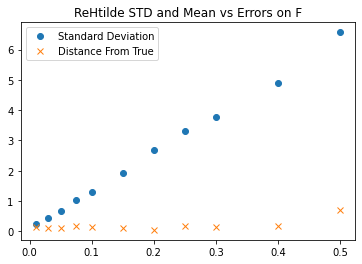

In [51]:
plt.plot(errValues, ReHtildeSTD, 'o', label = 'Standard Deviation')
plt.plot(errValues, ReHtildeMean, 'x', label = 'Distance From True')
plt.title("ReHtilde STD and Mean vs Errors on F")
plt.legend()

[13.0554, -53.0554, 7.25302]


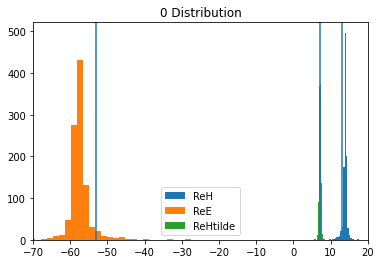

In [36]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.01) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [25, 30, 10])
mean005, std005 = calcMeanAndStd(_)

[13.0554, -53.0554, 7.25302]


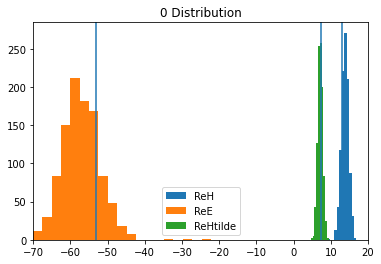

In [47]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.05) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [15, 20, 10])
mean005, std005 = calcMeanAndStd(_)

[13.0554, -53.0554, 7.25302]


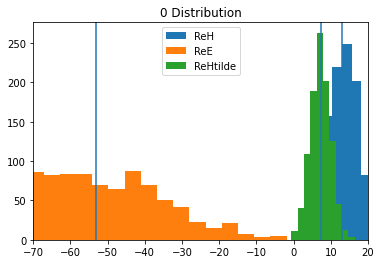

In [44]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.2) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [10, 30, 10])
mean005, std005 = calcMeanAndStd(_)

[13.0554, -53.0554, 7.25302]


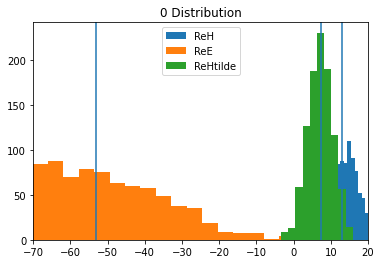

In [42]:
_ = pd.read_csv("Predictions\Method2-" + str(0.25) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [25, 30, 10])
mean005, std005 = calcMeanAndStd(_)